In [2]:
#数値計算ライブラリを追加
using LinearAlgebra
using Plots

In [3]:
#各変数を宣言
hc       = 197.327
mαc2     = 3727.379
e2       = 1.44
Z        = 84
Z_prime  = 82
Zα       = 2
V0       = 50
R        = 8.0
Δr       = 0.5
N        = 400
cΔt      = 0.2
Nexp     = 4
VB       = e2 * Zα * Z / R

30.24

In [4]:
function Vsw(r)
    if r < R
        return -V0
    else
        return VB
    end
end

Vsw (generic function with 1 method)

In [5]:
#Hswの計算
Hsw = zeros(N,N)

#対角成分の計算
for i in 1:N
    r = i * Δr
    Hsw[i, i] = - hc^2 / (2 * mαc2 * Δr^2) * (-2) + Vsw(r)
end

#非対角成分の計算
for i in 1:N-1
    Hsw[i, i+1] = - hc^2 / (2 * mαc2 * Δr^2)
    Hsw[i+1, i] = - hc^2 / (2 * mαc2 * Δr^2)
end

In [6]:
#Hswの対角化
ϵ,ψ = eigen(Symmetric(Hsw))


Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
400-element Vector{Float64}:
 -49.21807134001952
 -46.90092525040416
 -43.13347069482907
 -38.0538923028131
 -31.848789096220116
 -24.746632334573775
 -17.009794803323587
  -8.925459062277838
  -0.7957528037168231
   7.072520709546225
  14.378197847968707
  20.835792276496875
  26.184874939067214
   ⋮
 113.61283124115336
 113.64458066913588
 113.67357630856696
 113.69981624262857
 113.72329873667492
 113.74402223834709
 113.76198537767537
 113.77718696716981
 113.78962600189853
 113.79930165955405
 113.80621330050758
 113.8103604678513
vectors:
400×400 Matrix{Float64}:
 0.0676284      0.132759   -0.192983   …   6.95863e-15   3.47761e-15
 0.132726       0.245826   -0.322541      -4.06403e-14  -2.03109e-14
 0.192856       0.322429   -0.346096       2.30391e-13   1.15147e-13
 0.245768       0.351206   -0.255904      -1.30491e-12  -6.52204e-13
 0.289482       0.327888   -0.0816094      7.39062e-12   3.69403e-12
 0.322363    

In [7]:
#正のエネルギー固有値を持つ束縛状態を抽出
wavefunctions = []
energy_eigenvalues = []

for i in 1:N
    if VB > ϵ[i] > 0
        push!(energy_eigenvalues,ϵ[i])
        push!(wavefunctions,ψ[:,i])
    end
end

println("Number of bound states: ", length(energy_eigenvalues))

Number of bound states: 5


In [8]:
#Vsw+cの関数の作成
function Vsw_c(r)
    if r < R
        return -V0 
    else
        return e2 * Zα * Z_prime / r
    end
end

Vsw_c (generic function with 1 method)

In [9]:
#Hsw+cの作成
Hsw_c = zeros(N,N)

momentum_coefficient = - hc^2 / (2 * mαc2 * Δr^2)
#対角成分の計算
for i in 1:N
    r = i * Δr
    Hsw_c[i,i] = -2 * momentum_coefficient + Vsw_c(r)
end

#非対角成分の計算
for i in 1:N-1
    Hsw_c[i,i+1] = momentum_coefficient
    Hsw_c[i+1,i] = momentum_coefficient
end

In [10]:
function calc_next_evolution(ψ, H, N, cΔt, Nexp)
    ψ_next = zeros(Complex{Float64}, N)
    for k in 0:Nexp
        ψ_next += 1/factorial(k) * (cΔt / im / hc)^k * (H^k * ψ)
    end
    return ψ_next
end

calc_next_evolution (generic function with 1 method)

In [11]:
function calc_time_evolution(ψ, H, N, cΔt, Nexp, ct_f)
    N_max = Int(ct_f / cΔt)
    ψ_t = zeros(Complex{Float64}, N, N_max)
    ψ_t[:,1] = ψ
    for t in 2:N_max
        ψ_t[:,t] = calc_next_evolution(ψ_t[:,t-1], H, N, cΔt, Nexp)
    end
    return ψ_t
end

calc_time_evolution (generic function with 1 method)

In [22]:
#時間発展の計算
wavefunction = wavefunctions[4]
ct_f = 2000
ψ_t = calc_time_evolution(wavefunction, Hsw_c, N, cΔt, Nexp, ct_f)

400×10000 Matrix{ComplexF64}:
  0.201964+0.0im   0.201893-0.0053594im   …    0.0589912-0.157273im
 -0.332522+0.0im  -0.332405+0.00882395im      -0.0964552+0.258831im
  0.345514+0.0im   0.345392-0.00916871im       0.0984927-0.268324im
 -0.236347+0.0im  -0.236263+0.0062718im       -0.0649165+0.182317im
 0.0436173+0.0im  0.0436019-0.00115745im      0.00850592-0.0317073im
  0.164533+0.0im   0.164475-0.00436613im  …    0.0506992-0.129793im
 -0.314512+0.0im  -0.314401+0.00834603im      -0.0917068+0.244893im
  0.353292+0.0im   0.353168-0.00937512im       0.0996301-0.272873im
 -0.267163+0.0im  -0.267069+0.00708956im      -0.0719449+0.204688im
 0.0865764+0.0im  0.0865459-0.00229743im       0.0187854-0.0644169im
   0.12462+0.0im   0.124576-0.00330698im  …     0.041394-0.0989535im
 -0.291756+0.0im  -0.291653+0.00774218im       -0.087235+0.227677im
  0.355739+0.0im   0.355614-0.00944007im        0.102144-0.276005im
          ⋮                               ⋱  
       0.0+0.0im        0.0+0.0im    

In [ ]:
#確率密度の計算
time_evolved_probability_density = [] 

N_max = Int(ct_f / cΔt)
for i in 1:N_max
    push!(time_evolved_probability_density, abs.(ψ_t[:,i]).^2)
end

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\kanta\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\kanta\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 102 for log10 based yscale
└ @ Plots C:\Users\kanta\.julia\packages\Plots\Ec1L1\src\utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\kanta\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\kanta\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 213 for log10 based yscale
└ @ Plots C:\Users\kanta\.julia\packages\Plots\Ec1L1\src\utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\kanta\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\kanta\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Wa

Plots.AnimatedGif("c:\\numerical_calculation\\computational_physics\\final_report\\probability_density_evolution_4.gif")
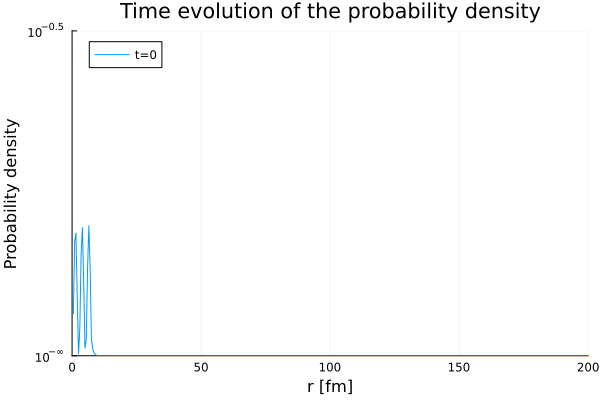

In [ ]:
# アニメーション作成
times = length(time_evolved_probability_density)
X = [i * Δr for i in 1:N]
anim = @animate for t in 1:100:times
    plot(
        X, time_evolved_probability_density[t],
        label="t=$(t-1)",
        xlims=(0, N * Δr),
        ylims=(0, 10^-0.5),
        xlabel="r [fm]",
        ylabel="Probability density",
        title="Time evolution of the probability density",
        legend=:topleft,
        yscale=:log10
    )
end

# GIFとして保存
gif(anim, "probability_density_evolution_4.gif", fps=10)

In [ ]:
#数学関数を積分する関数